In [1]:
import bt
import pandas as pd
import matplotlib as plt

%matplotlib inline

In [8]:
all_data = pd.DataFrame([[10.0, 0.0],
                         [22.0, 1.0],
                         [24.0, 1.0],
                         [26.0, 1.0],
                         [32.5, 0.0],
                         [42.0, 0.0,]], columns=['p', 'w'])

In [9]:
all_data

,p,w
0,10.0,0.0
1,22.0,1.0
2,24.0,1.0
3,26.0,1.0
4,32.5,0.0
5,42.0,0.0


In [11]:
npv =  1000.0

p_, w_ = 0.0, 0.0
n_, c_ = 0.0, 1000.0

res = pd.DataFrame()
cols = ["p", "dp", "w", "dw", "n", "c", "dnpv", "npv"]

for idxT in range(len(all_data)):
    p, w = all_data.iloc[idxT, 0], all_data.iloc[idxT, 1]

    dp, dw = p - p_, w - w_

    maxN = npv / p

    dn = dw * maxN
    n = dn + n_

    dc = -dn * p
    c = dc + c_

    dnpv = p*dn + n*dc + dc 
    npv += dnpv

    p_, w_ = p, w

    res = res.append(pd.DataFrame([[p, dp, w, dw, n, c, dnpv, npv]], 
                     columns=cols))

res

,p,dp,w,dw,n,c,dnpv,npv
0,10.0,10.0,0.0,0.0,0.000000,1000.000000,0.000000e+00,1.000000e+03
0,22.0,12.0,1.0,1.0,45.454545,0.000000,-4.545455e+04,-4.445455e+04
0,24.0,2.0,1.0,0.0,0.000000,1000.000000,0.000000e+00,-4.445455e+04
0,26.0,2.0,1.0,0.0,0.000000,1000.000000,0.000000e+00,-4.445455e+04
0,32.5,6.5,0.0,-1.0,1367.832168,-43454.545455,-6.080636e+07,-6.085081e+07
0,42.0,9.5,0.0,0.0,0.000000,1000.000000,0.000000e+00,-6.085081e+07


In [5]:
weights = all_data.loc[:, ["w"]]
weights.columns = [field_name]

In [7]:
s = bt.Strategy('specw', [bt.algos.WeighTarget(weights),
                               bt.algos.Rebalance()])
t = bt.Backtest(s, all_data.loc[:, ["p"]])
res = bt.run(t)

specw
0% [########## ] 100% | ETA: 00:00:00

In [13]:
res.get_security_weights()

,Close
2009-12-31,0.0
2010-01-01,0.0
2010-02-01,0.0
2010-03-01,1.0
2010-04-01,1.0
2010-05-01,0.0
2010-06-01,1.0
2010-07-01,-1.0
2010-08-01,-1.0
2010-09-01,0.0


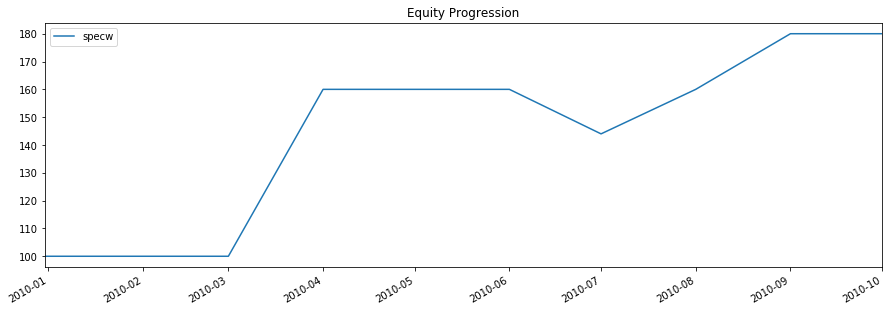

In [9]:
res.plot()

In [10]:
res.prices

,specw
2009-12-31,100.0
2010-01-01,100.0
2010-02-01,100.0
2010-03-01,100.0
2010-04-01,160.0
2010-05-01,160.0
2010-06-01,160.0
2010-07-01,144.0
2010-08-01,160.0
2010-09-01,180.0


In [14]:
res.get_transactions()

,,price,quantity
Date,Security,,
2010-03-01,Close,25.0,40000.0
2010-05-01,Close,40.0,-40000.0
2010-06-01,Close,50.0,32000.0
2010-07-01,Close,45.0,-64000.0
2010-08-01,Close,40.0,-8000.0
2010-09-01,Close,35.0,40000.0


In [ ]:
re